In [39]:
# import necessary packages
import os
import matplotlib.pyplot as plt
import geopandas as gpd
from descartes import PolygonPatch
import pandas as pd
import numpy as np
import seaborn as sns

# import shapefile using geopandas
dh_buurten_data = gpd.read_file('data/ruimtelijke_kengetallen2019/ruimtelijke_kengetallen2019.shp').set_index("code")
dh_ov_haltes = gpd.read_file('data/ovhaltes/ovhaltes.shp').set_index("COUNTER")

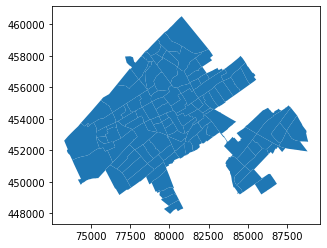

In [40]:
dh_buurten_data.plot()

In [41]:
dh_buurten_data.head(3)

,std_koppel,std_id_s,std_id_i,wk_koppel,wk_id_s,wk_id_i,brt_koppel,brt_id_s,brt_id_i,brt_naam,...,wps3,wps4,wps5,wps6,wps7,wps8,wps9,partauto,partmotor,geometry
code,,,,,,,,,,,,,,,,,,,,,
1,04 Scheveningen,04,4,07 Scheveningen,07,7,01 Oud Scheveningen,01,1,Oud Scheveningen,...,147.0,257.0,38.0,104.0,30.0,36.0,28.0,976,106,"POLYGON ((78223.220 457985.570, 78231.290 4579..."
2,04 Scheveningen,04,4,07 Scheveningen,07,7,02 Vissershaven,02,2,Vissershaven,...,1117.0,606.0,3.0,179.0,61.0,317.0,30.0,1327,111,"POLYGON ((77191.010 457958.840, 77522.880 4579..."
3,04 Scheveningen,04,4,07 Scheveningen,07,7,03 Scheveningen Badplaats,03,3,Scheveningen Badplaats,...,1144.0,588.0,212.0,95.0,101.0,534.0,46.0,1883,166,"POLYGON ((78464.480 458272.310, 78487.180 4582..."


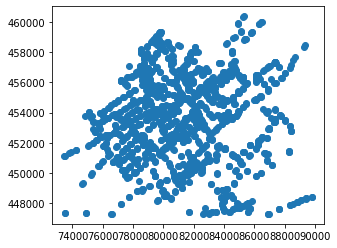

In [42]:
dh_ov_haltes.plot()

In [43]:
dh_ov_haltes.head(3)

,TYPE,NAAM,EXPLOITANT,XCO,YCO,GEMEENTE,geometry
COUNTER,,,,,,,
101333.0,bus,"Den Haag, Dalerveenstraat",Veolia (incl. Connexxion),79012.0,451835.0,Den Haag,POINT (79012.000 451835.000)
101334.0,bus,"Wassenaar, Wittenburgerweg",Veolia (incl. Connexxion),84121.0,458513.0,Wassenaar,POINT (84121.000 458513.000)
101335.0,bus,"Leidschendam, Koningin Julianaplein",Veolia (incl. Connexxion),87434.0,455963.0,Leidschendam-Voorburg,POINT (87434.000 455963.000)


In [44]:
ttprs = dh_buurten_data["ttprs"].replace("x",None)
ttprs = ttprs.dropna().astype("int")

In [45]:
dh_buurten_data["ttprs"] = ttprs

C:\Users\joche\Anaconda3\lib\site-packages\matplotlib\colors.py:527: RuntimeWarning: invalid value encountered in less
  xa[xa < 0] = -1


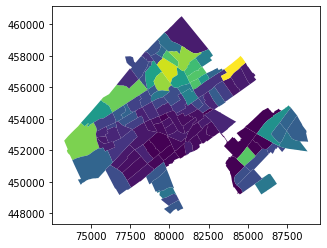

In [46]:
dh_buurten_data.plot(column="ttprs")

In [47]:
migration = pd.read_csv('data/migration.csv',sep=";",decimal=",").replace(",",".",regex=True).set_index("Buurten").replace("x",0).replace("-",0).astype("float")
migration

,% Nederlands|2019,% Turks|2019,% Marokkaans|2019,% Surinaams|2019,% Antilliaans|2019,% Overig niet-westers|2019,% Westers|2019
Buurten,,,,,,,
01 Oud Scheveningen,76.8,0.8,0.5,1.5,0.9,5.3,14.2
02 Vissershaven,71.5,0.7,1.0,2.2,1.0,6.1,17.7
03 Scheveningen Badplaats,65.9,0.5,0.4,1.5,0.9,8.8,21.9
04 Visserijbuurt,64.8,0.4,1.4,2.0,1.0,8.3,22.0
05 v Stolkpark/Schev Bosjes,56.4,0.0,0.8,0.8,1.2,8.4,32.0
...,...,...,...,...,...,...,...
117 De Rivieren,100.0,0.0,0.0,0.0,0.0,0.0,0.0
118 De Lanen,55.1,4.3,3.5,12.2,2.7,12.2,10.0
119 De Velden,59.3,3.4,3.3,10.9,1.2,11.6,10.3


In [48]:
income = pd.read_csv('data/inkomen.csv',sep=";").set_index("Buurten")
income

,Gem. persoonlijk 52 weken inkomen individuen|2010,Gem. persoonlijk 52 weken inkomen individuen|2011,Gem. persoonlijk 52 weken inkomen individuen|2012,Gem. persoonlijk 52 weken inkomen individuen|2013,Gem. persoonlijk 52 weken inkomen individuen|2014,Gem. persoonlijk 52 weken inkomen individuen|2015,Gem. persoonlijk 52 weken inkomen individuen|2016,Gem. persoonlijk 52 weken inkomen individuen|2017
Buurten,,,,,,,,
01 Oud Scheveningen,28100,29200,28200,29600,28300.0,29600.0,30000.0,30000.0
02 Vissershaven,28300,28700,29600,30300,29800.0,29500.0,31300.0,34500.0
03 Scheveningen Badplaats,35000,35900,36000,36400,35000.0,35500.0,36400.0,38200.0
04 Visserijbuurt,31600,32100,32800,33100,33000.0,32700.0,34000.0,35700.0
05 v Stolkpark/Schev Bosjes,68400,70200,75600,78000,75200.0,77400.0,74300.0,85700.0
...,...,...,...,...,...,...,...,...
118 De Lanen,37100,38400,38400,39000,37600.0,38400.0,38800.0,39200.0
119 De Velden,36900,37600,38500,39200,37300.0,37600.0,38600.0,38700.0
120 De Vissen,37200,37600,38100,38900,36200.0,37100.0,38200.0,38900.0


In [49]:
income_2010 = income.filter(like="2010",axis=1).replace("x",None).replace("-",None).astype("int")
income_2011 = income.filter(like="2011",axis=1).replace("x",None).replace("-",None).astype("int")
income_2012 = income.filter(like="2012",axis=1).replace("x",None).replace("-",None).astype("int")
income_2013 = income.filter(like="2013",axis=1).replace("x",None).replace("-",None).astype("int")
income_2014 = income.filter(like="2014",axis=1).replace("x",None).replace("-",None).replace(np.nan,None).astype("int")
income_2015 = income.filter(like="2015",axis=1).replace("x",None).replace("-",None).replace(np.nan,None).astype("int")
income_2016 = income.filter(like="2016",axis=1).replace("x",None).replace("-",None).replace(np.nan,None).astype("int")
income_2017 = income.filter(like="2017",axis=1).replace("x",None).replace("-",None).replace(np.nan,None).astype("int")

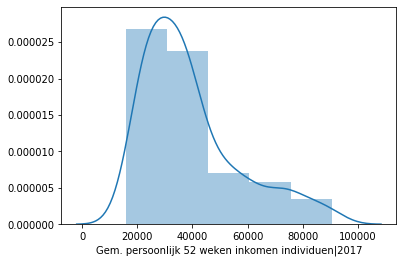

In [50]:
#When dividing income into 5 "social classes", this is the distribution.
sns.distplot(income_2017["Gem. persoonlijk 52 weken inkomen individuen|2017"],bins=5)

In [51]:
criminaliteit = pd.read_csv('data/criminaliteit.csv',sep=";").set_index("Buurten")
criminaliteit

,Overlast jeugd|2018,Overlast drugs|2018,Overlast personen|2018,Overlast geluid|2018,Overlast conflictbemiddeling|2018,Fietsendiefstal|2018,Diefstal van brom- en snorfietsen|2018,Diefstal van motorvoertuigen|2018,Diefstal uit/vanaf voertuigen|2018,Winkeldiefstal|2018,Diefstal uit bedrijven en instellingen|2018,Diefstal uit woningen|2018,Zakkenrollerij|2018,Bedreiging|2018,Mishandeling|2018,Straatroven|2018,Vernieling|2018,Overvallen|2018,Totaal|2018
Buurten,,,,,,,,,,,,,,,,,,,
01 Oud Scheveningen,19,5,26,70,30,15,5,x,6,x,NaN,x,x,10,6,NaN,10,x,211.0
02 Vissershaven,42,x,85,52,79,50,9,x,14,17,7,7,5,x,26,x,36,NaN,440.0
03 Scheveningen Badplaats,44,6,127,131,85,44,9,x,25,x,18,10,18,21,35,NaN,41,NaN,619.0
04 Visserijbuurt,19,x,71,41,46,22,8,x,x,17,x,6,5,15,16,NaN,18,NaN,291.0
05 v Stolkpark/Schev Bosjes,9,NaN,33,8,9,x,x,NaN,6,x,NaN,x,x,x,5,x,5,NaN,85.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
117 De Rivieren,x,x,8,x,13,5,x,x,9,x,11,NaN,NaN,x,5,NaN,6,NaN,73.0
118 De Lanen,30,x,8,35,35,17,x,x,16,NaN,NaN,8,x,x,5,NaN,15,NaN,178.0
119 De Velden,13,x,14,24,26,25,x,5,9,13,x,x,x,x,9,NaN,12,NaN,164.0


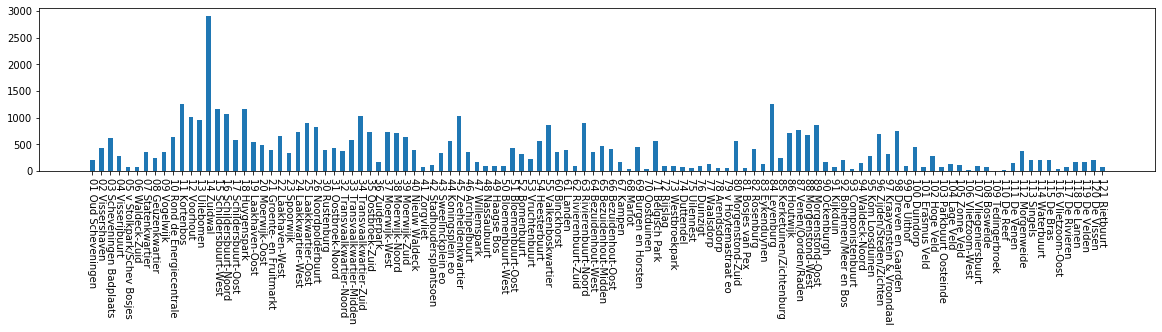

In [52]:
plt.figure(figsize=(20, 3))  # width:20, height:3
plt.bar(criminaliteit.reset_index()["Buurten"],criminaliteit["Totaal|2018"],width=0.5, align="center")
plt.xticks(rotation=-90)
plt.show()